In [104]:
import pandas as pd                      
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [73]:
df = pd.read_csv("https://api.covid19india.org/csv/latest/case_time_series.csv",parse_dates=[1])
print(df.shape)
df.head(5)

(501, 8)


,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January 2020,2020-01-30,1,1,0,0,0,0
1,31 January 2020,2020-01-31,0,1,0,0,0,0
2,1 February 2020,2020-02-01,0,1,0,0,0,0
3,2 February 2020,2020-02-02,1,2,0,0,0,0
4,3 February 2020,2020-02-03,1,3,0,0,0,0


In [53]:
df.tail(5)

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
496,9 June 2021,2021-06-09,93883,29181911,149022,27645065,6139,359106
497,10 June 2021,2021-06-10,91849,29273760,135329,27780394,3414,362520
498,11 June 2021,2021-06-11,84574,29358334,122685,27903079,3996,366516
499,12 June 2021,2021-06-12,80525,29438859,132664,28035743,3300,369816
500,13 June 2021,2021-06-13,71001,29509860,119574,28155317,3922,373738


In [74]:
df.drop(columns=["Daily Confirmed","Total Confirmed","Daily Recovered","Total Recovered","Total Deceased","Date"],inplace=True)

In [83]:
df.set_index("Date_YMD",inplace=True)
df

,Daily Deceased
Date_YMD,
2020-01-30,0
2020-01-31,0
2020-02-01,0
2020-02-02,0
2020-02-03,0
...,...
2021-06-09,6139
2021-06-10,3414
2021-06-11,3996


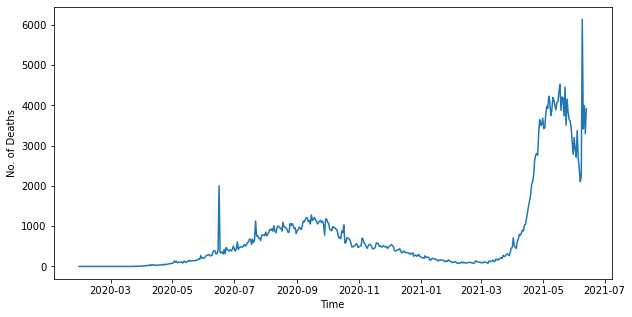

In [87]:
plt.figure(figsize=(10,5))
plt.xlabel("Time")
plt.ylabel("No. of Deaths")
plt.plot(df)

In [111]:
rollingmean=df.rolling(window=7).mean()
rollingsd=df.rolling(window=7).std()

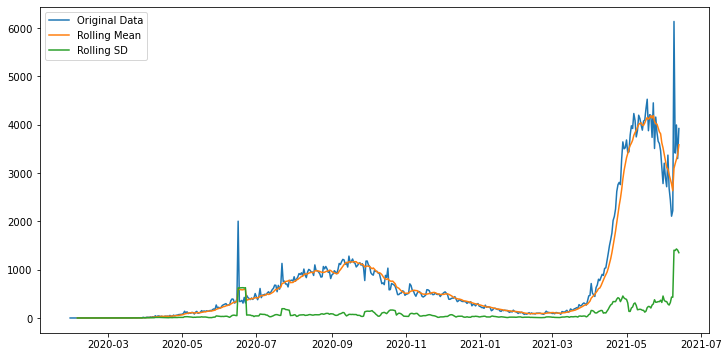

In [135]:
plt.figure(figsize=(12,6))
original=plt.plot(df,label="Original Data")
rollingmean_plot=plt.plot(rollingmean,label="Rolling Mean")
rollingsd_plot=plt.plot(rollingsd,label="Rolling SD")
plt.legend()

In [118]:
from statsmodels.tsa.stattools import adfuller
adftest=adfuller(df["Daily Deceased"])
adftest[1]

0.9967464311982892

In [119]:
#INFERENCE:NON-STATIONARY SERIES

In [130]:
from scipy.stats import yeojohnson
transformed_data=yeojohnson(df)

In [131]:
scaled_df=pd.DataFrame(index=df.index)
scaled_df["Deaths"]=transformed_data[0]

In [132]:
scaled_df

,Deaths
Date_YMD,
2020-01-30,0.000000
2020-01-31,0.000000
2020-02-01,0.000000
2020-02-02,0.000000
2020-02-03,0.000000
...,...
2021-06-09,26.984978
2021-06-10,23.116754
2021-06-11,24.105097


In [133]:
scaledrollingmean=scaled_df.rolling(window=7).mean()
scaledrollingsd=scaled_df.rolling(window=7).std()

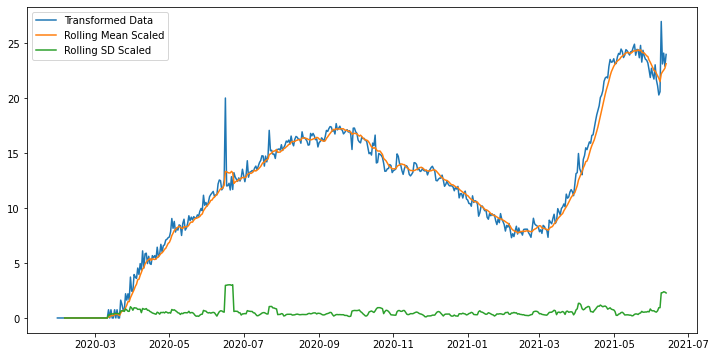

In [136]:
plt.figure(figsize=(12,6))
original=plt.plot(scaled_df,label="Transformed Data")
rollingmean_plot=plt.plot(scaledrollingmean,label="Rolling Mean Scaled")
rollingsd_plot=plt.plot(scaledrollingsd,label="Rolling SD Scaled")
plt.legend()

Text(0.5, 1.0, 'Shifted Plot')

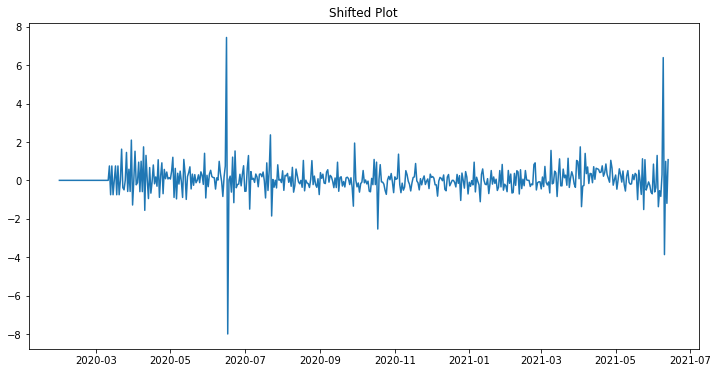

In [146]:
shifted_dataset=scaled_df-scaled_df.shift(1)
shifted_dataset.dropna(inplace=True)
plt.figure(figsize=(12,6))
plt.plot(shifted_dataset)
plt.title("Shifted Plot")

In [147]:
adfuller(shifted_dataset)

(-4.290454769286063,
 0.00046142639408315936,
 9,
 490,
 {'1%': -3.4437660979098843,
  '5%': -2.8674565460819896,
  '10%': -2.569921291128696},
 1047.7358205368805)

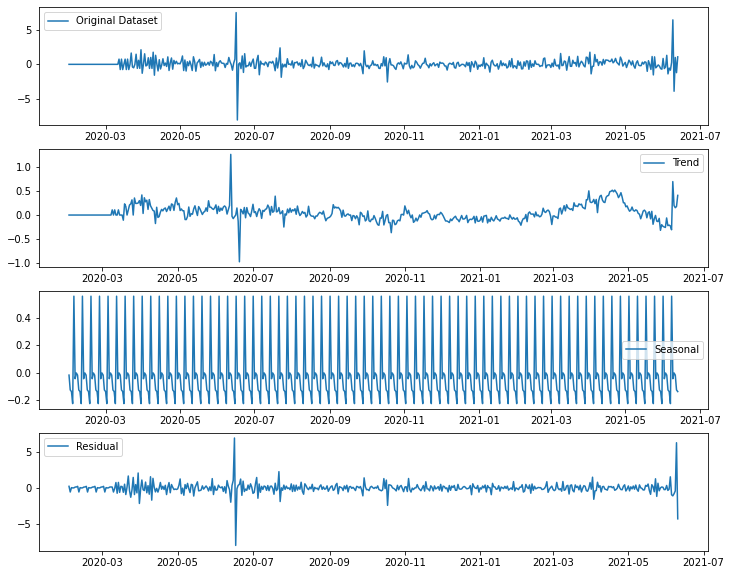

In [156]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed=seasonal_decompose(shifted_dataset)

trend=decomposed.trend
seasonal=decomposed.seasonal
residual=decomposed.resid

plt.figure(figsize=(12,10))
plt.subplot(411)
plt.plot(shifted_dataset,label="Original Dataset")
plt.legend()
plt.subplot(412)
plt.plot(trend,label="Trend")
plt.legend()
plt.subplot(413)
plt.plot(seasonal,label="Seasonal")
plt.legend()
plt.subplot(414)
plt.plot(residual,label="Residual")
plt.legend()

In [160]:
residual.dropna(inplace=True)

In [161]:
adfuller(residual)

(-10.303826867754983,
 3.318606142366276e-18,
 18,
 475,
 {'1%': -3.4441920863262863,
  '5%': -2.8676439813617147,
  '10%': -2.570021186703601},
 625.41701797853)